## Observations and Insights 

Observations:
1. Capomulin and Ramicane seem to be the most effective drugs out of the 4 analyzed. The mice on these drugs ended up with lower tumor volumes than those on the other 2 drugs.

2. If a mouse has a higher body weight, then those mice tend to have larger tumors (as measured by tumor volume).

3. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count = len(set(df['Mouse ID']))
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = df[df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse = duplicate_mice['Mouse ID'].unique()
#dup_mouse

dup_data = df.set_index('Mouse ID').loc[dup_mouse]
dup_data




,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df = df[df['Mouse ID'] != dup_mouse[0]]
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = len(set(df['Mouse ID']))
clean_mouse_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_dev = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
SEM = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Create summary statistics DF
summary = pd.DataFrame({
                        "Mean Tumor Vol": mean,
                        "Median Tumor Vol": median,
                        "Variance of Tumor Vol": variance,
                        "Standard Deviation of Tumor Vol": std_dev,
                        "SEM of Tumor Vol": SEM })
summary

,Mean Tumor Vol,Median Tumor Vol,Variance of Tumor Vol,Standard Deviation of Tumor Vol,SEM of Tumor Vol
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary2 = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median','var','std','sem'])
summary2


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

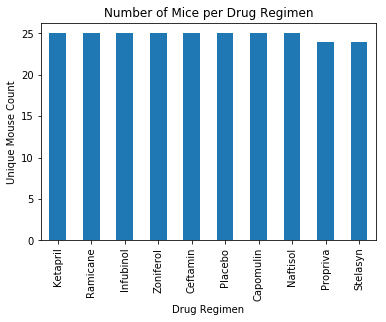

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
unique = df.drop_duplicates(subset=['Mouse ID'])
unique_mouse_bar = unique['Drug Regimen'].value_counts().to_frame()

unique_mouse_bar.plot.bar(title="Number of Mice per Drug Regimen", legend=False)
plt.xlabel('Drug Regimen')
plt.ylabel('Unique Mouse Count')
plt.show()


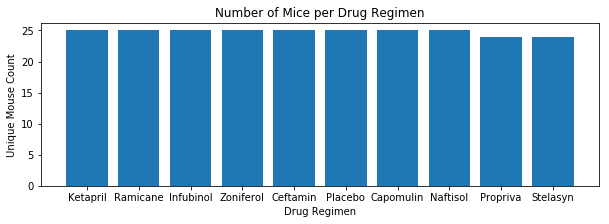

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

unique_mouse_bar_new = unique_mouse_bar.reset_index()
plt.figure(figsize=(10,3))
plt.bar(unique_mouse_bar_new['index'], unique_mouse_bar_new['Drug Regimen'])
plt.xlabel('Drug Regimen')
plt.ylabel('Unique Mouse Count')
plt.title('Number of Mice per Drug Regimen')
plt.show()

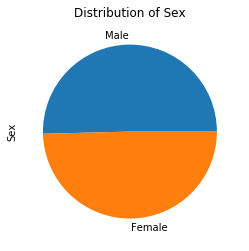

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_sex = unique['Sex'].value_counts().to_frame()

mouse_sex.plot.pie(y='Sex',title="Distribution of Sex", legend=False)
plt.show()


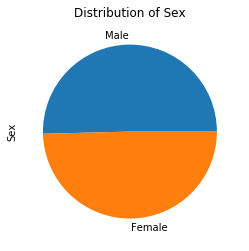

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mouse_sex_pyplt = mouse_sex.reset_index()
#plt.figure(figsize=(10,3))

plt.pie(mouse_sex_pyplt['Sex'], labels = mouse_sex_pyplt['index'])
plt.ylabel('Sex')
plt.title('Distribution of Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
group = df.groupby(['Mouse ID'])['Timepoint'].max().to_frame()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor_vol = pd.merge(group,df,how='inner',left_on=['Mouse ID','Timepoint'],right_on=['Mouse ID','Timepoint'])
final_tumor_vol.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [14]:
# Capomulin
capomulin = final_tumor_vol[final_tumor_vol['Drug Regimen'] == 'Capomulin']
capomulin_vol = capomulin['Tumor Volume (mm3)'].tolist()
capomulin_iqr = st.iqr(capomulin_vol)
#capomulin_quartile = np.percentile(capomulin_vol, [25, 50, 75])


# Ramicane
ramicane = final_tumor_vol[final_tumor_vol['Drug Regimen'] == 'Ramicane']
ramicane_vol = ramicane['Tumor Volume (mm3)'].tolist()
ramicane_iqr = st.iqr(ramicane_vol)
#ramicane_quartile = np.percentile(ramicane, [25, 50, 75])


# Infubinol
infubinol = final_tumor_vol[final_tumor_vol['Drug Regimen'] == 'Infubinol']
infubinol_vol = infubinol['Tumor Volume (mm3)'].tolist()
infubinol_iqr = st.iqr(infubinol_vol)
#infubinol_quartile = np.percentile(infubinol, [25, 50, 75])


# Ceftamin
ceftamin = final_tumor_vol[final_tumor_vol['Drug Regimen'] == 'Ceftamin']
ceftamin_vol = ceftamin['Tumor Volume (mm3)'].tolist()
ceftamin_iqr = st.iqr(ceftamin_vol)
#ceftamin_quartile = np.percentile(ceftamin, [25, 50, 75])

    

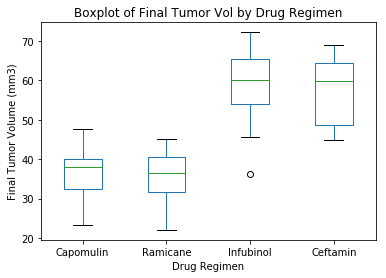

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

box = pd.DataFrame({
                        "Capomulin": capomulin_vol,
                        "Ramicane": ramicane_vol,
                        "Infubinol": infubinol_vol,
                        "Ceftamin": ceftamin_vol })
box

box.plot.box()
plt.xlabel('Drug Regimen')
plt.ylabel("Final Tumor Volume (mm3)")
plt.title('Boxplot of Final Tumor Vol by Drug Regimen')
plt.show()

## Line and Scatter Plots

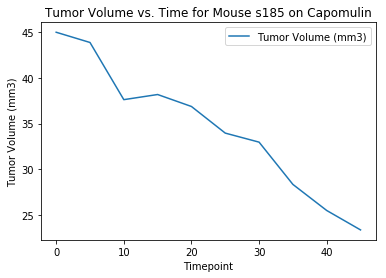

In [26]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_mouse = df[df['Mouse ID']=='s185']
capomulin_mouse.plot(kind = 'line', x = 'Timepoint', y = 'Tumor Volume (mm3)', title = 'Tumor Volume vs. Time for Mouse s185 on Capomulin')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

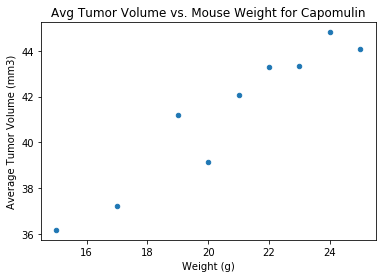

In [42]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_scatter = df[df['Drug Regimen']=='Capomulin']

capomulin_scatter = capomulin_scatter.groupby('Weight (g)')['Tumor Volume (mm3)'].mean().to_frame().reset_index()
capomulin_scatter

scatter = capomulin_scatter.plot(kind = 'scatter', x = "Weight (g)", y = 'Tumor Volume (mm3)', title = 'Avg Tumor Volume vs. Mouse Weight for Capomulin')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
